STUDENT PERFORMANCE INDICATOR

LIFE CYCLE OF MACHINE LEARNING PROJECT 


1.Understanding the problem statement 
2.Data cCollection
3.Data Checks to Perform 
4.Exploratory data Analysis
5.Data Preprocessing
6.Model Training
7.Choose best Model


## Problem Statement

To Understand how the students performance (test scores) is affected by other variables such as gender, ethnicity , parent level of education , lnch and test prep course 



2) Data Collection 
source:- https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/stud.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

DATA Check to perform
MISSING VALUES. DUPLICATES, DATATYPE,NO.. OF UNIQUE VALUES OF EACH COLUMN 
##STATISTICS OF DATA 
CHECK VARIOUS CATEGORIES PRESENT IN DIFFERENCT CATEGORICAL COLUMN

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
#define numerical and categorical features
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

## print columns
print('we have {} numerical features and {} categorical features'.format(len(numeric_features),len(categorical_features)),numeric_features,categorical_features)

we have 3 numerical features and 5 categorical features ['math score', 'reading score', 'writing score'] ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## adding column for total score and average

In [18]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full=df[df['reading score'] == 100]['average_score'].count()
writting_full=df[df['writing score'] == 100]['average_score'].count()
math_full=df[df['math score'] == 100]['average_score'].count()
print('reading full score:',reading_full)
print('writting full score:',writting_full)
print('math full score:',math_full)

reading full score: 17
writting full score: 14
math full score: 7


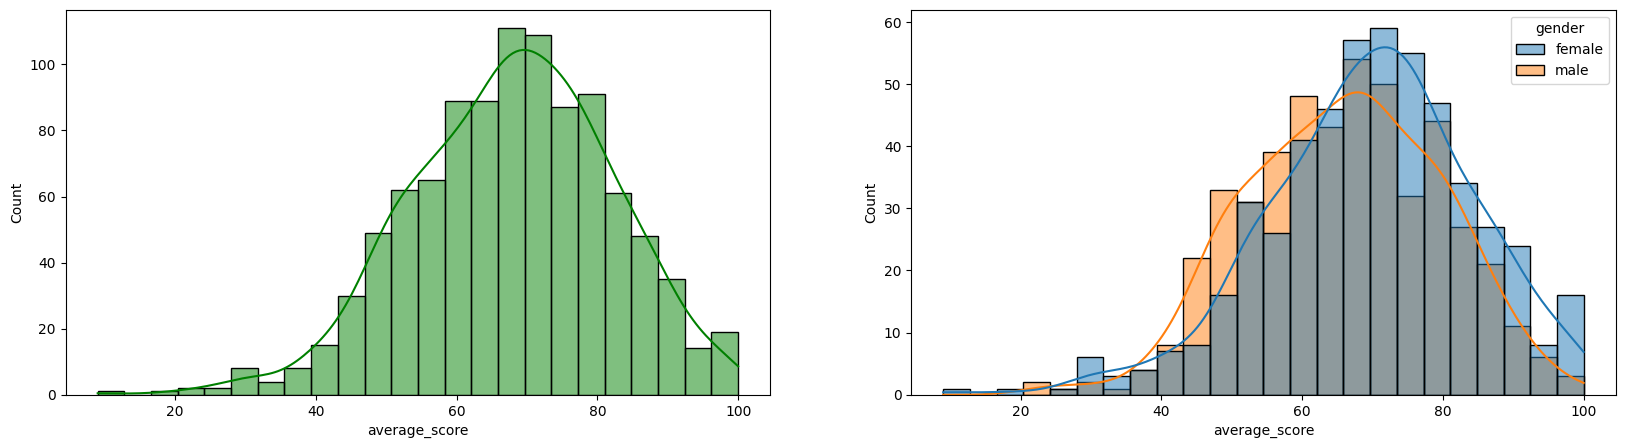

In [23]:
fig,axs= plt.subplots(1,3,figsize=(20,5))
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()
